In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Looking at the Data 
 ------------------

### Importing the Dataset - 
 * We have found 2 different datasets of the same survey from our source. 
 * One of them has already been normalised. This is useful for model-based analysis. 
 * However, the normalisation casues many correlations betweeen different attributed to be lost...
 * That's why we also have a raw Unnormalised Dataset. We will be starting out analysis using this.

In [2]:
df_norm = pd.read_csv('communities.data', header=None)
df = pd.read_csv('CommViolPredUnnormalizedData.txt')

In [3]:
#Reading Information about the Data & Attributes in the .names file
fh = open('communities.names', 'r')
lines = fh.readlines()
fh.close()
attributes_norm = []
for line in lines:
    print(line, end='')
    if line.startswith('@attribute'):
        attributes_norm.append(line.split()[1])
df_norm.columns = attributes_norm


Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

In [4]:
#Extract attribute_data
attributes = []
with open('attribute_data.txt', 'r') as f:
    for line in f:
        if '@attribute' in line:
            attributes.append(line.split()[1])
print(len(attributes))
df.columns = attributes

147


In [5]:
#save df to csv
df.to_csv('communities.csv')

In [6]:
df.describe()

,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,...,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit,murders,murdPerPop
count,2214.000000,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2214.000000,2214.000000,2214.000000,2214.00000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,5.496387,5.313657e+04,2.707150,9.338699,83.976296,2.668473,7.952918,14.446730,27.647642,13.976518,...,61.543162,51.532385,77.410772,88.11140,27.429404,2784.258672,3.038148,0.980605,7.768293,5.861942
std,2.871984,2.046646e+05,0.334091,14.249369,16.421952,4.474113,14.592557,4.519448,6.181506,5.971745,...,16.753020,10.516238,10.880634,7.28945,109.846510,2829.562169,4.912029,2.877702,58.179375,9.158050
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,6.750000,11.830000,27.950000,32.83000,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.437125e+04,2.500000,0.860000,76.310000,0.620000,0.930000,12.250000,24.420000,11.320000,...,50.110000,44.992500,72.060000,85.20000,7.300000,1181.850000,0.360000,0.000000,0.000000,0.000000
50%,5.000000,2.280300e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.545000,...,64.500000,52.170000,79.495000,90.03000,13.700000,2029.600000,1.220000,0.000000,1.000000,2.180000
75%,8.000000,4.304350e+04,2.850000,11.157500,96.227500,2.670000,7.810000,15.360000,29.207500,14.347500,...,74.862500,58.727500,85.137500,93.01000,26.100000,3322.250000,3.357500,0.000000,3.000000,8.367500
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,93.140000,78.560000,96.590000,99.90000,3569.800000,44229.900000,54.330000,48.440000,1946.000000,91.090000


In [7]:
#Okay, Let's take a look at all out Attributes -
i = 0
for at in df.columns:
    print(at, end = '\t')
    i+=1
    if(i%8 == 0):
        print("\n")

communityname	State	countyCode	communityCode	fold	pop	perHoush	pctBlack	

pctWhite	pctAsian	pctHisp	pct12-21	pct12-29	pct16-24	pct65up	persUrban	

pctUrban	medIncome	pctWwage	pctWfarm	pctWdiv	pctWsocsec	pctPubAsst	pctRetire	

medFamIncome	perCapInc	whitePerCap	blackPerCap	NAperCap	asianPerCap	otherPerCap	hispPerCap	

persPoverty	pctPoverty	pctLowEdu	pctNotHSgrad	pctCollGrad	pctUnemploy	pctEmploy	pctEmployMfg	

pctEmployProfServ	pctOccupManu	pctOccupMgmt	pctMaleDivorc	pctMaleNevMar	pctFemDivorc	pctAllDivorc	persPerFam	

pct2Par	pctKids2Par	pctKids-4w2Par	pct12-17w2Par	pctWorkMom-6	pctWorkMom-18	kidsBornNevrMarr	pctKidsBornNevrMarr	

numForeignBorn	pctFgnImmig-3	pctFgnImmig-5	pctFgnImmig-8	pctFgnImmig-10	pctImmig-3	pctImmig-5	pctImmig-8	

pctImmig-10	pctSpeakOnlyEng	pctNotSpeakEng	pctLargHousFam	pctLargHous	persPerOccupHous	persPerOwnOccup	persPerRenterOccup	

pctPersOwnOccup	pctPopDenseHous	pctSmallHousUnits	medNumBedrm	houseVacant	pctHousOccup	pctHousOwnerOccup	pctVacantBoarded	

pctVa

# Are there Missing Values?
-------------------

In [8]:
print("Total number of samples - ", len(df))

Total number of samples -  2214


## How many missing values are there?

In [9]:
# ? = Nan
df = df.replace('?', np.nan)
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(len(missing_values))
print(missing_values)

41
countyCode           1221
communityCode        1224
otherPerCap             1
numPolice            1871
policePerPop         1871
policeField          1871
policeFieldPerPop    1871
policeCalls          1871
policCallPerPop      1871
policCallPerOffic    1871
policePerPop2        1871
racialMatch          1871
pctPolicWhite        1871
pctPolicBlack        1871
pctPolicHisp         1871
pctPolicAsian        1871
pctPolicMinority     1871
officDrugUnits       1871
numDiffDrugsSeiz     1871
policAveOT           1871
policCarsAvail       1871
policOperBudget      1871
pctPolicPatrol       1871
gangUnit             1871
policBudgetPerPop    1871
rapes                 208
rapesPerPop           208
robberies               1
robbbPerPop             1
assaults               13
assaultPerPop          13
burglaries              3
burglPerPop             3
larcenies               3
larcPerPop              3
autoTheft               3
autoTheftPerPop         3
arsons                 91
arsonsPer

## Looks like we have a lot of missing values in our dataset.
* During our research we found that missing values for rapes was very common, as people didn't want to report such a sensitive issue.
* However, it's important to fill in such missing data, so that we can use it for our analysis, and prevent such incidents in the future.
### Dealing with the missing values - 
* As there are a total of 2214 datapoints, we decided that we'll drop all the attributes that have more than 1000 missing values.
* The others can be filled in using various methods.


In [10]:
#Drop attributes with 1000+ missing values - 
drop_count = 0
mean_count = 0
for i in missing_values.index:
    if missing_values[i] > 1000:    #drop
        df = df.drop(i, axis=1)
        missing_values = missing_values.drop(i)
        drop_count += 1

    elif missing_values[i] < 15:    #fill mean
        df[i] = pd.to_numeric(df[i], errors='coerce')
        df[i] = df[i].fillna(df[i].mean())
        missing_values = missing_values.drop(i)
        mean_count += 1
    
    else:                           # Change later...
        df[i] = pd.to_numeric(df[i], errors='coerce')
        df[i] = df[i].fillna(df[i].mean())
        missing_values = missing_values.drop(i)
        mean_count += 1
df = df.select_dtypes(include=['int64', 'float64'])

        
print("Droped ", drop_count, " attributes")
print("Filled Mean for ", mean_count, " attributes")

Droped  24  attributes
Filled Mean for  17  attributes


## Okay, Now let's look at the attributes we have - 

In [11]:
#Okay, Let's take a look at all out Attributes -
i = 0
for at in df.columns:
    print(at, end = '\t')
    i+=1
    if(i%8 == 0):
        print("\n")

fold	pop	perHoush	pctBlack	pctWhite	pctAsian	pctHisp	pct12-21	

pct12-29	pct16-24	pct65up	persUrban	pctUrban	medIncome	pctWwage	pctWfarm	

pctWdiv	pctWsocsec	pctPubAsst	pctRetire	medFamIncome	perCapInc	whitePerCap	blackPerCap	

NAperCap	asianPerCap	otherPerCap	hispPerCap	persPoverty	pctPoverty	pctLowEdu	pctNotHSgrad	

pctCollGrad	pctUnemploy	pctEmploy	pctEmployMfg	pctEmployProfServ	pctOccupManu	pctOccupMgmt	pctMaleDivorc	

pctMaleNevMar	pctFemDivorc	pctAllDivorc	persPerFam	pct2Par	pctKids2Par	pctKids-4w2Par	pct12-17w2Par	

pctWorkMom-6	pctWorkMom-18	kidsBornNevrMarr	pctKidsBornNevrMarr	numForeignBorn	pctFgnImmig-3	pctFgnImmig-5	pctFgnImmig-8	

pctFgnImmig-10	pctImmig-3	pctImmig-5	pctImmig-8	pctImmig-10	pctSpeakOnlyEng	pctNotSpeakEng	pctLargHousFam	

pctLargHous	persPerOccupHous	persPerOwnOccup	persPerRenterOccup	pctPersOwnOccup	pctPopDenseHous	pctSmallHousUnits	medNumBedrm	

houseVacant	pctHousOccup	pctHousOwnerOccup	pctVacantBoarded	pctVacant6up	medYrHousBuilt	pctHousWOphone	pctHousWO

### Let's....MAKE GROUPS OF RELATED ATTRIBUTES -
As there are too many attributes, it'll be useful to make a few broad categories

In [12]:
#Let's....MAKE GROUPS OF RELATED ATTRIBUTES - 
dfc = df.columns

#Demography Attributes
s = dfc.get_loc('pctBlack')
f = dfc.get_loc('pctNotSpeakEng')
demography_attributes = dfc[s:f]

#Housing Attributes
s = dfc.get_loc('numForeignBorn')
f = dfc.get_loc('pctSameState-5')
housing_attributes = dfc[s:f]

#Crime Attributes
s = dfc.get_loc('murders')
crime_attributes = dfc[s::]

print("Demography - ", demography_attributes)
print("Housing - ", housing_attributes)
print("Crime - ", crime_attributes)

Demography -  Index(['pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29',
       'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage',
       'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire',
       'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap',
       'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty',
       'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy',
       'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt',
       'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc',
       'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par',
       'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr',
       'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3',
       'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3',
       'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng'],
      dtype='object')

In [13]:
attributes_of_intrest = [
    'pctBlack',
    'pctWhite',
    'pctLowEdu',
    
    'pctPoverty',
    'perCapInc',
    'pctUnemploy',
    'medFamIncome',

    'pctNotSpeakEng',
    'pctForeignBorn',
    'pctAllDivorc',
]
attributes_of_intrest.extend(crime_attributes)
attributes_of_intrest

['pctBlack',
 'pctWhite',
 'pctLowEdu',
 'pctPoverty',
 'perCapInc',
 'pctUnemploy',
 'medFamIncome',
 'pctNotSpeakEng',
 'pctForeignBorn',
 'pctAllDivorc',
 'murders',
 'murdPerPop',
 'rapes',
 'rapesPerPop',
 'robberies',
 'robbbPerPop',
 'assaults',
 'assaultPerPop',
 'burglaries',
 'burglPerPop',
 'larcenies',
 'larcPerPop',
 'autoTheft',
 'autoTheftPerPop',
 'arsons',
 'arsonsPerPop',
 'violentPerPop',
 'nonViolPerPop']

# Correlations between Attributes
-----------------------------------

In [14]:
df.correlation = df.corr()
df.correlation.to_csv('correlation.csv')
df.correlation

C:\Users\HP\AppData\Local\Temp\ipykernel_3604\1503782761.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.correlation = df.corr()


,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
fold,1.000000,-0.044505,0.016819,-0.040484,0.023323,0.005047,0.035347,-0.016034,-0.024522,-0.023341,...,-0.047164,-0.024835,-0.042864,-0.027413,-0.050529,-0.028487,-0.059712,-0.048806,-0.033324,-0.027466
pop,-0.044505,1.000000,-0.018740,0.135601,-0.184652,0.088454,0.094015,-0.007664,0.046167,0.017655,...,0.970541,0.119022,0.965983,0.066302,0.980737,0.244864,0.899739,0.157894,0.199000,0.122830
perHoush,0.016819,-0.018740,1.000000,-0.047176,-0.230452,0.186414,0.485569,0.491888,0.385063,0.318278,...,-0.033916,-0.101767,-0.048688,-0.237408,-0.011658,0.022824,-0.012937,-0.015177,-0.019106,-0.191290
pctBlack,-0.040484,0.135601,-0.047176,1.000000,-0.820585,-0.089105,-0.064023,0.096954,0.119776,0.089571,...,0.210660,0.548412,0.183336,0.362579,0.158658,0.409106,0.151261,0.276153,0.590024,0.470462
pctWhite,0.023323,-0.184652,-0.230452,-0.820585,1.000000,-0.276718,-0.408437,-0.142171,-0.208129,-0.124167,...,-0.250505,-0.565458,-0.225133,-0.321216,-0.206533,-0.556965,-0.195816,-0.333391,-0.641129,-0.475960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
autoTheftPerPop,-0.028487,0.244864,0.022824,0.409106,-0.556965,0.183849,0.348411,-0.058975,0.068983,-0.003321,...,0.329249,0.539284,0.302873,0.362364,0.307139,1.000000,0.255882,0.346042,0.601288,0.584786
arsons,-0.059712,0.899739,-0.012937,0.151261,-0.195816,0.063681,0.098778,-0.001516,0.043448,0.016760,...,0.888597,0.134138,0.876873,0.072628,0.909864,0.255882,1.000000,0.282844,0.214213,0.141889
arsonsPerPop,-0.048806,0.157894,-0.015177,0.276153,-0.333391,0.043895,0.152689,0.025368,0.070154,0.026097,...,0.211193,0.409576,0.199433,0.303090,0.167361,0.346042,0.282844,1.000000,0.385946,0.410489
violentPerPop,-0.033324,0.199000,-0.019106,0.590024,-0.641129,0.031862,0.250682,0.021953,0.099558,0.042197,...,0.290762,0.671457,0.270378,0.492567,0.227432,0.601288,0.214213,0.385946,1.000000,0.628723


<Axes: >

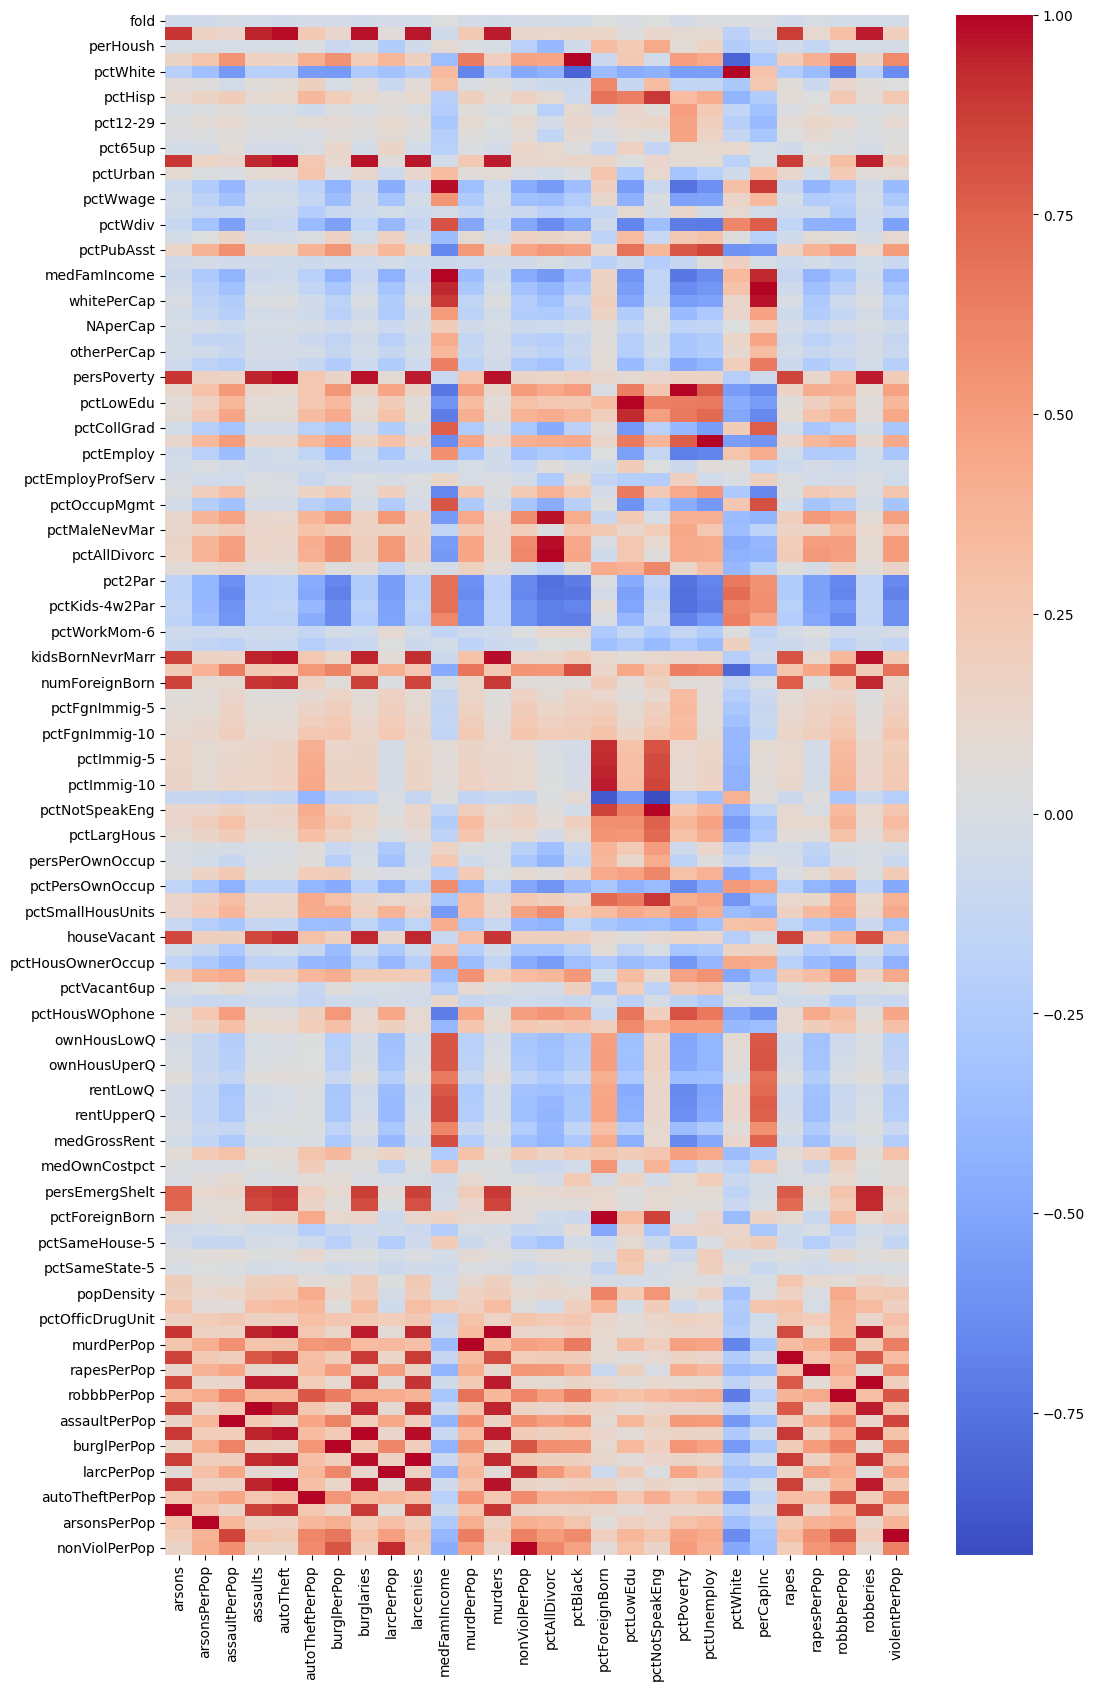

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the correlation matrix from the csv file
corr_df = pd.read_csv('correlation.csv', index_col=0)

corr_df = corr_df[crime_attributes.union(attributes_of_intrest)]

# Plot the heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(corr_df, cmap='coolwarm')


## Correlation of crime_attributes with other attributes

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

limit = 0.5
dict_to_plt = {}
for attr in crime_attributes:
    #top 10 correlations
    print("\n\n", attr)
    print(df.correlation[attr][df.correlation[attr] > limit].sort_values(ascending=False))
    dict_to_plt[attr] = df.correlation[attr][df.correlation[attr] > limit].sort_values(ascending=False)



 murders
murders             1.000000
kidsBornNevrMarr    0.978138
persPoverty         0.976129
autoTheft           0.970700
pop                 0.959295
robberies           0.958199
persUrban           0.957484
burglaries          0.956125
assaults            0.945236
larcenies           0.933758
arsons              0.897147
houseVacant         0.896683
persEmergShelt      0.892609
numForeignBorn      0.892225
persHomeless        0.851798
rapes               0.832412
Name: murders, dtype: float64


 murdPerPop
murdPerPop             1.000000
robbbPerPop            0.690264
pctKidsBornNevrMarr    0.679534
pctBlack               0.651632
violentPerPop          0.635293
assaultPerPop          0.558748
pctVacantBoarded       0.554842
burglPerPop            0.548922
autoTheftPerPop        0.526678
pctPubAsst             0.520657
Name: murdPerPop, dtype: float64


 rapes
rapes               1.000000
burglaries          0.894575
larcenies           0.883855
pop                 0.875909
per

In [17]:
#Plotting the top 10 correlations of crime attribute
def plot_top_10(attr):
    sns.barplot(x=dict_to_plt[attr], y=dict_to_plt[attr].index)
    plt.title("Top 10 correlations with "+attr)
    plt.show()

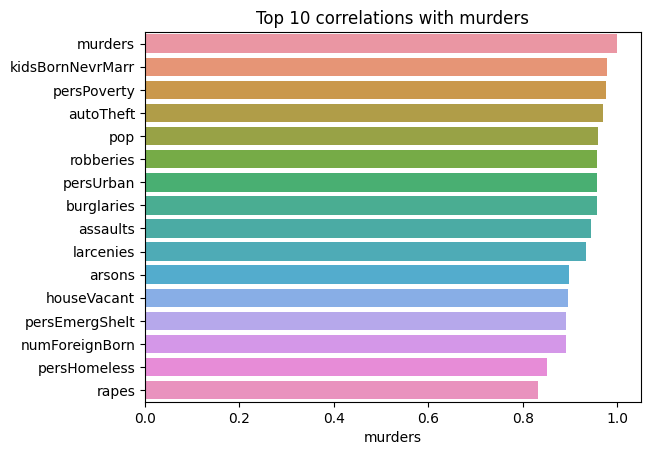

In [18]:
plot_top_10('murders')

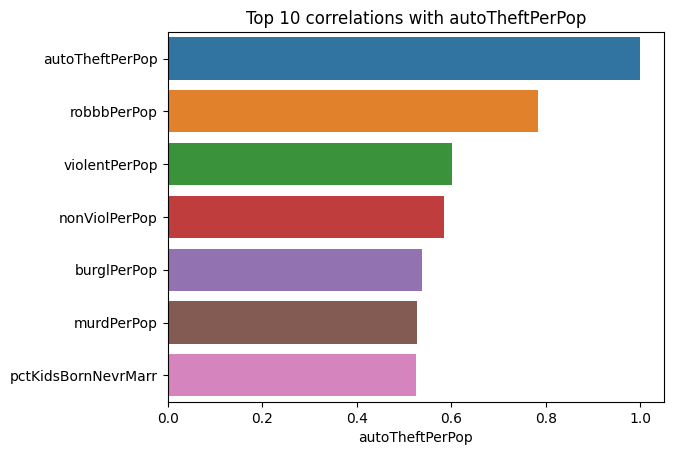

In [19]:
plot_top_10('autoTheftPerPop')

## Crime & Demographics - correlations

In [20]:
# Crime & Demography
limit = 0.3
dict_for_plots = {}
for i in df.correlation.columns:
    if i in crime_attributes:
        print("\n\n", i)
        dict_for_plots[i] = []
        for j in demography_attributes:
            if df.correlation[i][j] > limit:
                print(j, df.correlation[i][j])
                dict_for_plots[i].append(j)
                

def plot_demography_crime(attr):
    sns.barplot(x=df.correlation[attr][dict_for_plots[attr]], y=dict_for_plots[attr])
    plt.title("Correlations with "+attr)
    plt.show()
    



 murders
persUrban 0.95748407066665
persPoverty 0.9761287061769489
kidsBornNevrMarr 0.9781382449696076
numForeignBorn 0.8922252287937013


 murdPerPop
pctBlack 0.6516324306701348
pctPubAsst 0.5206574690427527
pctPoverty 0.4828105425033194
pctLowEdu 0.32241818860352
pctNotHSgrad 0.4123052517129852
pctUnemploy 0.46523559604298725
pctMaleDivorc 0.4377503258067201
pctFemDivorc 0.45509492382883693
pctAllDivorc 0.45765677786340164
pctKidsBornNevrMarr 0.6795341051932761


 rapes
persUrban 0.8758741328051415
persPoverty 0.8542212134573195
kidsBornNevrMarr 0.8031493070100002
numForeignBorn 0.7708694759628696


 rapesPerPop
pctBlack 0.4029665916597764
pctPubAsst 0.3846594751110376
pctPoverty 0.41703923406934645
pctUnemploy 0.3458294617923371
pctMaleDivorc 0.5174823181934729
pctFemDivorc 0.5006980005785647
pctAllDivorc 0.5184823828505886
pctKidsBornNevrMarr 0.45411440659981533


 robberies
persUrban 0.9528426861561271
persPoverty 0.9602559438526754
kidsBornNevrMarr 0.9753361874364931
numForeign

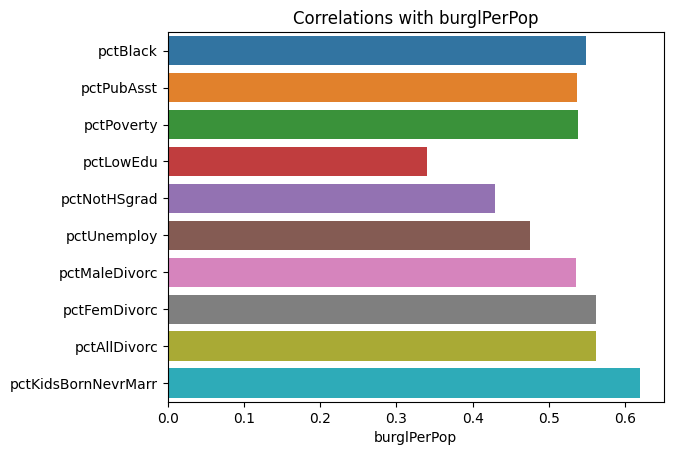

In [21]:
plot_demography_crime('burglPerPop')

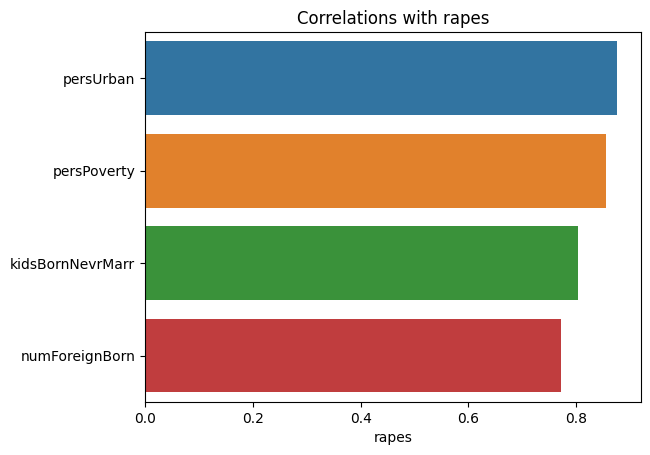

In [22]:
plot_demography_crime('rapes')

# Correlation of violentPerPop with other attributes

In [23]:
import seaborn as sns
def plot_demography_crime():
    sns.set_style("darkgrid")
    plt.figure(figsize=(20, 40))
    sns.barplot(
        x=df.correlation['violentPerPop'][demography_attributes].sort_values(ascending=False), 
        y=df.correlation['violentPerPop'][demography_attributes].sort_values(ascending=False).index, 
        palette="rocket")
#Print Attributes in ascending order of correlation with violentPerPop
print(df.correlation['violentPerPop'][demography_attributes].sort_values(ascending=False))


pctKidsBornNevrMarr    0.688152
pctBlack               0.590024
pctPubAsst             0.510148
pctFemDivorc           0.508194
pctAllDivorc           0.506746
pctMaleDivorc          0.481824
pctPoverty             0.474144
pctNotHSgrad           0.446282
pctUnemploy            0.431444
pctLowEdu              0.361623
pctOccupManu           0.268107
pctFgnImmig-10         0.264570
pctMaleNevMar          0.256207
pctHisp                0.250682
pctImmig-10            0.246401
pctImmig-8             0.234395
pctImmig-5             0.228364
pctFgnImmig-8          0.223260
persPoverty            0.219631
kidsBornNevrMarr       0.217596
pctImmig-3             0.211205
persUrban              0.200433
pctFgnImmig-5          0.191041
pctFgnImmig-3          0.149291
persPerFam             0.147105
numForeignBorn         0.141281
pctWsocsec             0.101529
pct12-29               0.099558
pctUrban               0.082932
pct65up                0.053029
pct16-24               0.042197
pctAsian

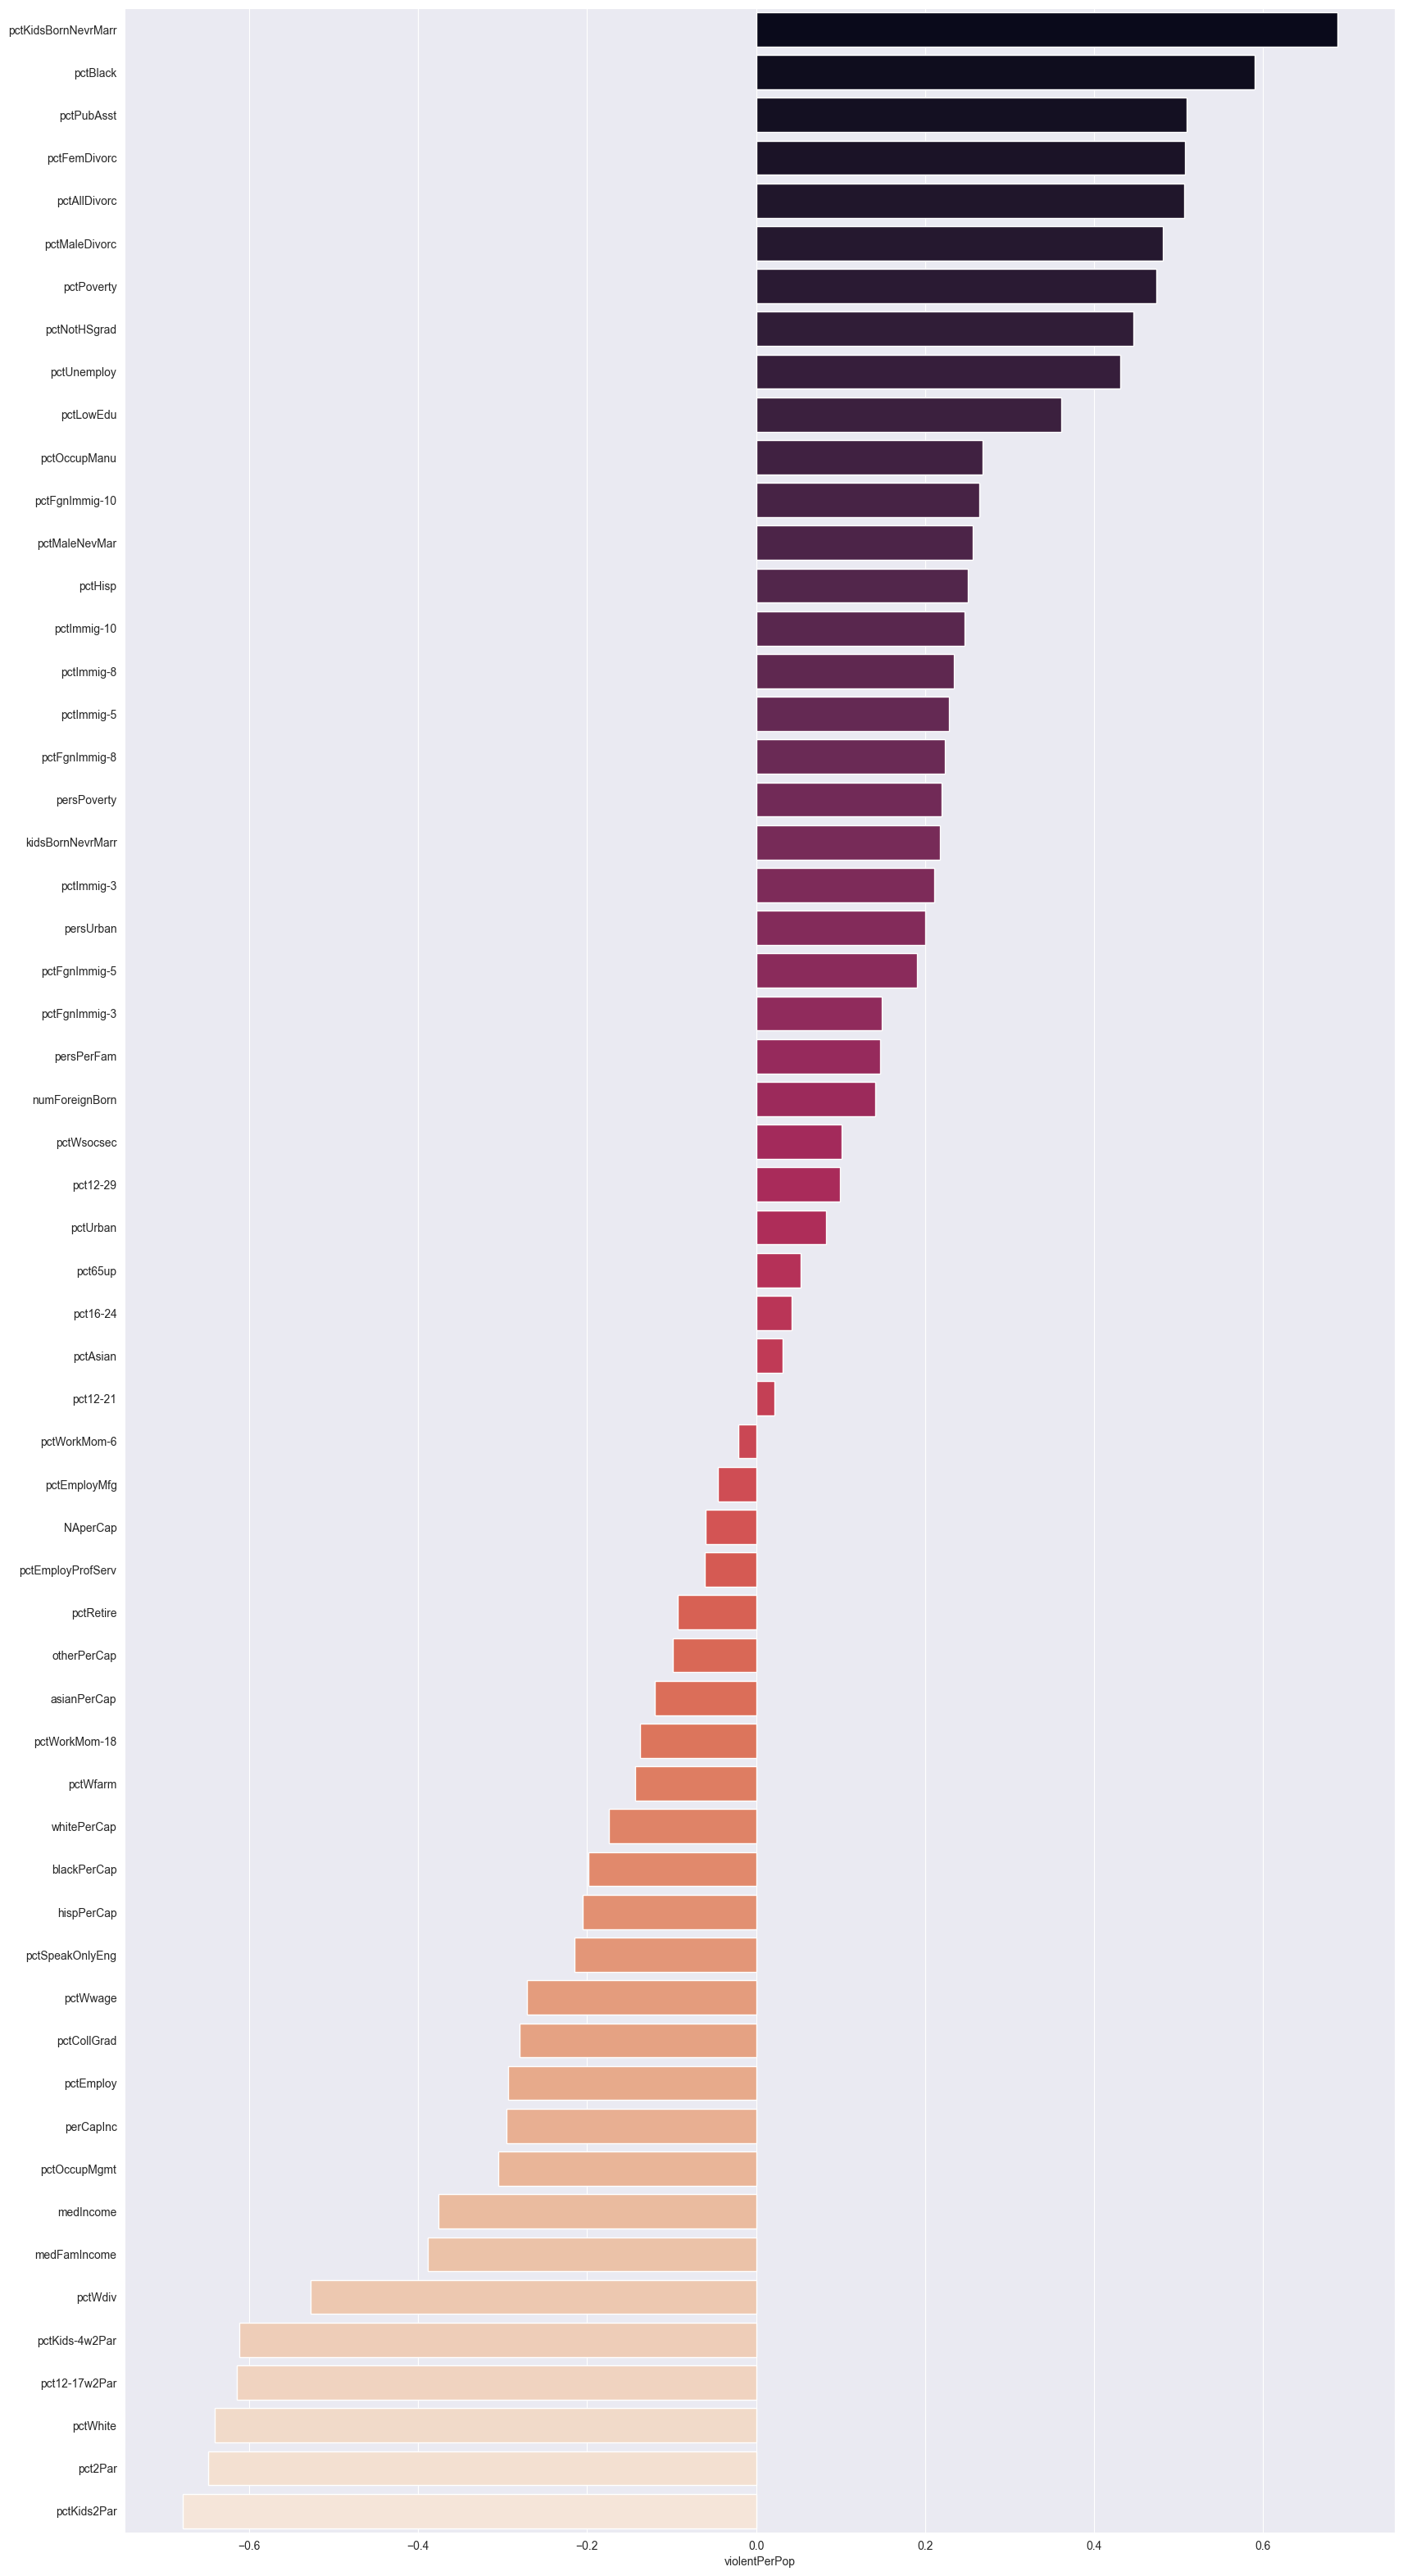

In [24]:
plot_demography_crime()

# Upon first glance, it may seem as though there exists a strong correlation between race and crime.
### However, this is a univariate analysis, and we must look deeper and also consider other factors such as poverty, education, etc.

In [25]:
# Print Attributes in ascending order of correlation with demographics
print(df.correlation['pctBlack'][demography_attributes].sort_values(ascending=False))

pctBlack               1.000000
pctKidsBornNevrMarr    0.814887
pctPoverty             0.497042
pctPubAsst             0.484203
pctAllDivorc           0.453543
pctFemDivorc           0.449744
pctUnemploy            0.441471
pctMaleDivorc          0.423225
pctNotHSgrad           0.367139
pctMaleNevMar          0.279719
pctLowEdu              0.244776
pctOccupManu           0.237585
pctFgnImmig-10         0.222041
kidsBornNevrMarr       0.200228
pctFgnImmig-8          0.200017
persPoverty            0.177032
pctFgnImmig-5          0.173292
pctFgnImmig-3          0.149585
persUrban              0.135168
pct12-29               0.119776
pctWorkMom-6           0.118699
pctWsocsec             0.111540
pctEmployProfServ      0.096959
pct12-21               0.096954
pct16-24               0.089571
pctSpeakOnlyEng        0.087224
persPerFam             0.065144
numForeignBorn         0.052741
pct65up                0.037479
pctWorkMom-18          0.027185
pctUrban               0.016051
pctImmig

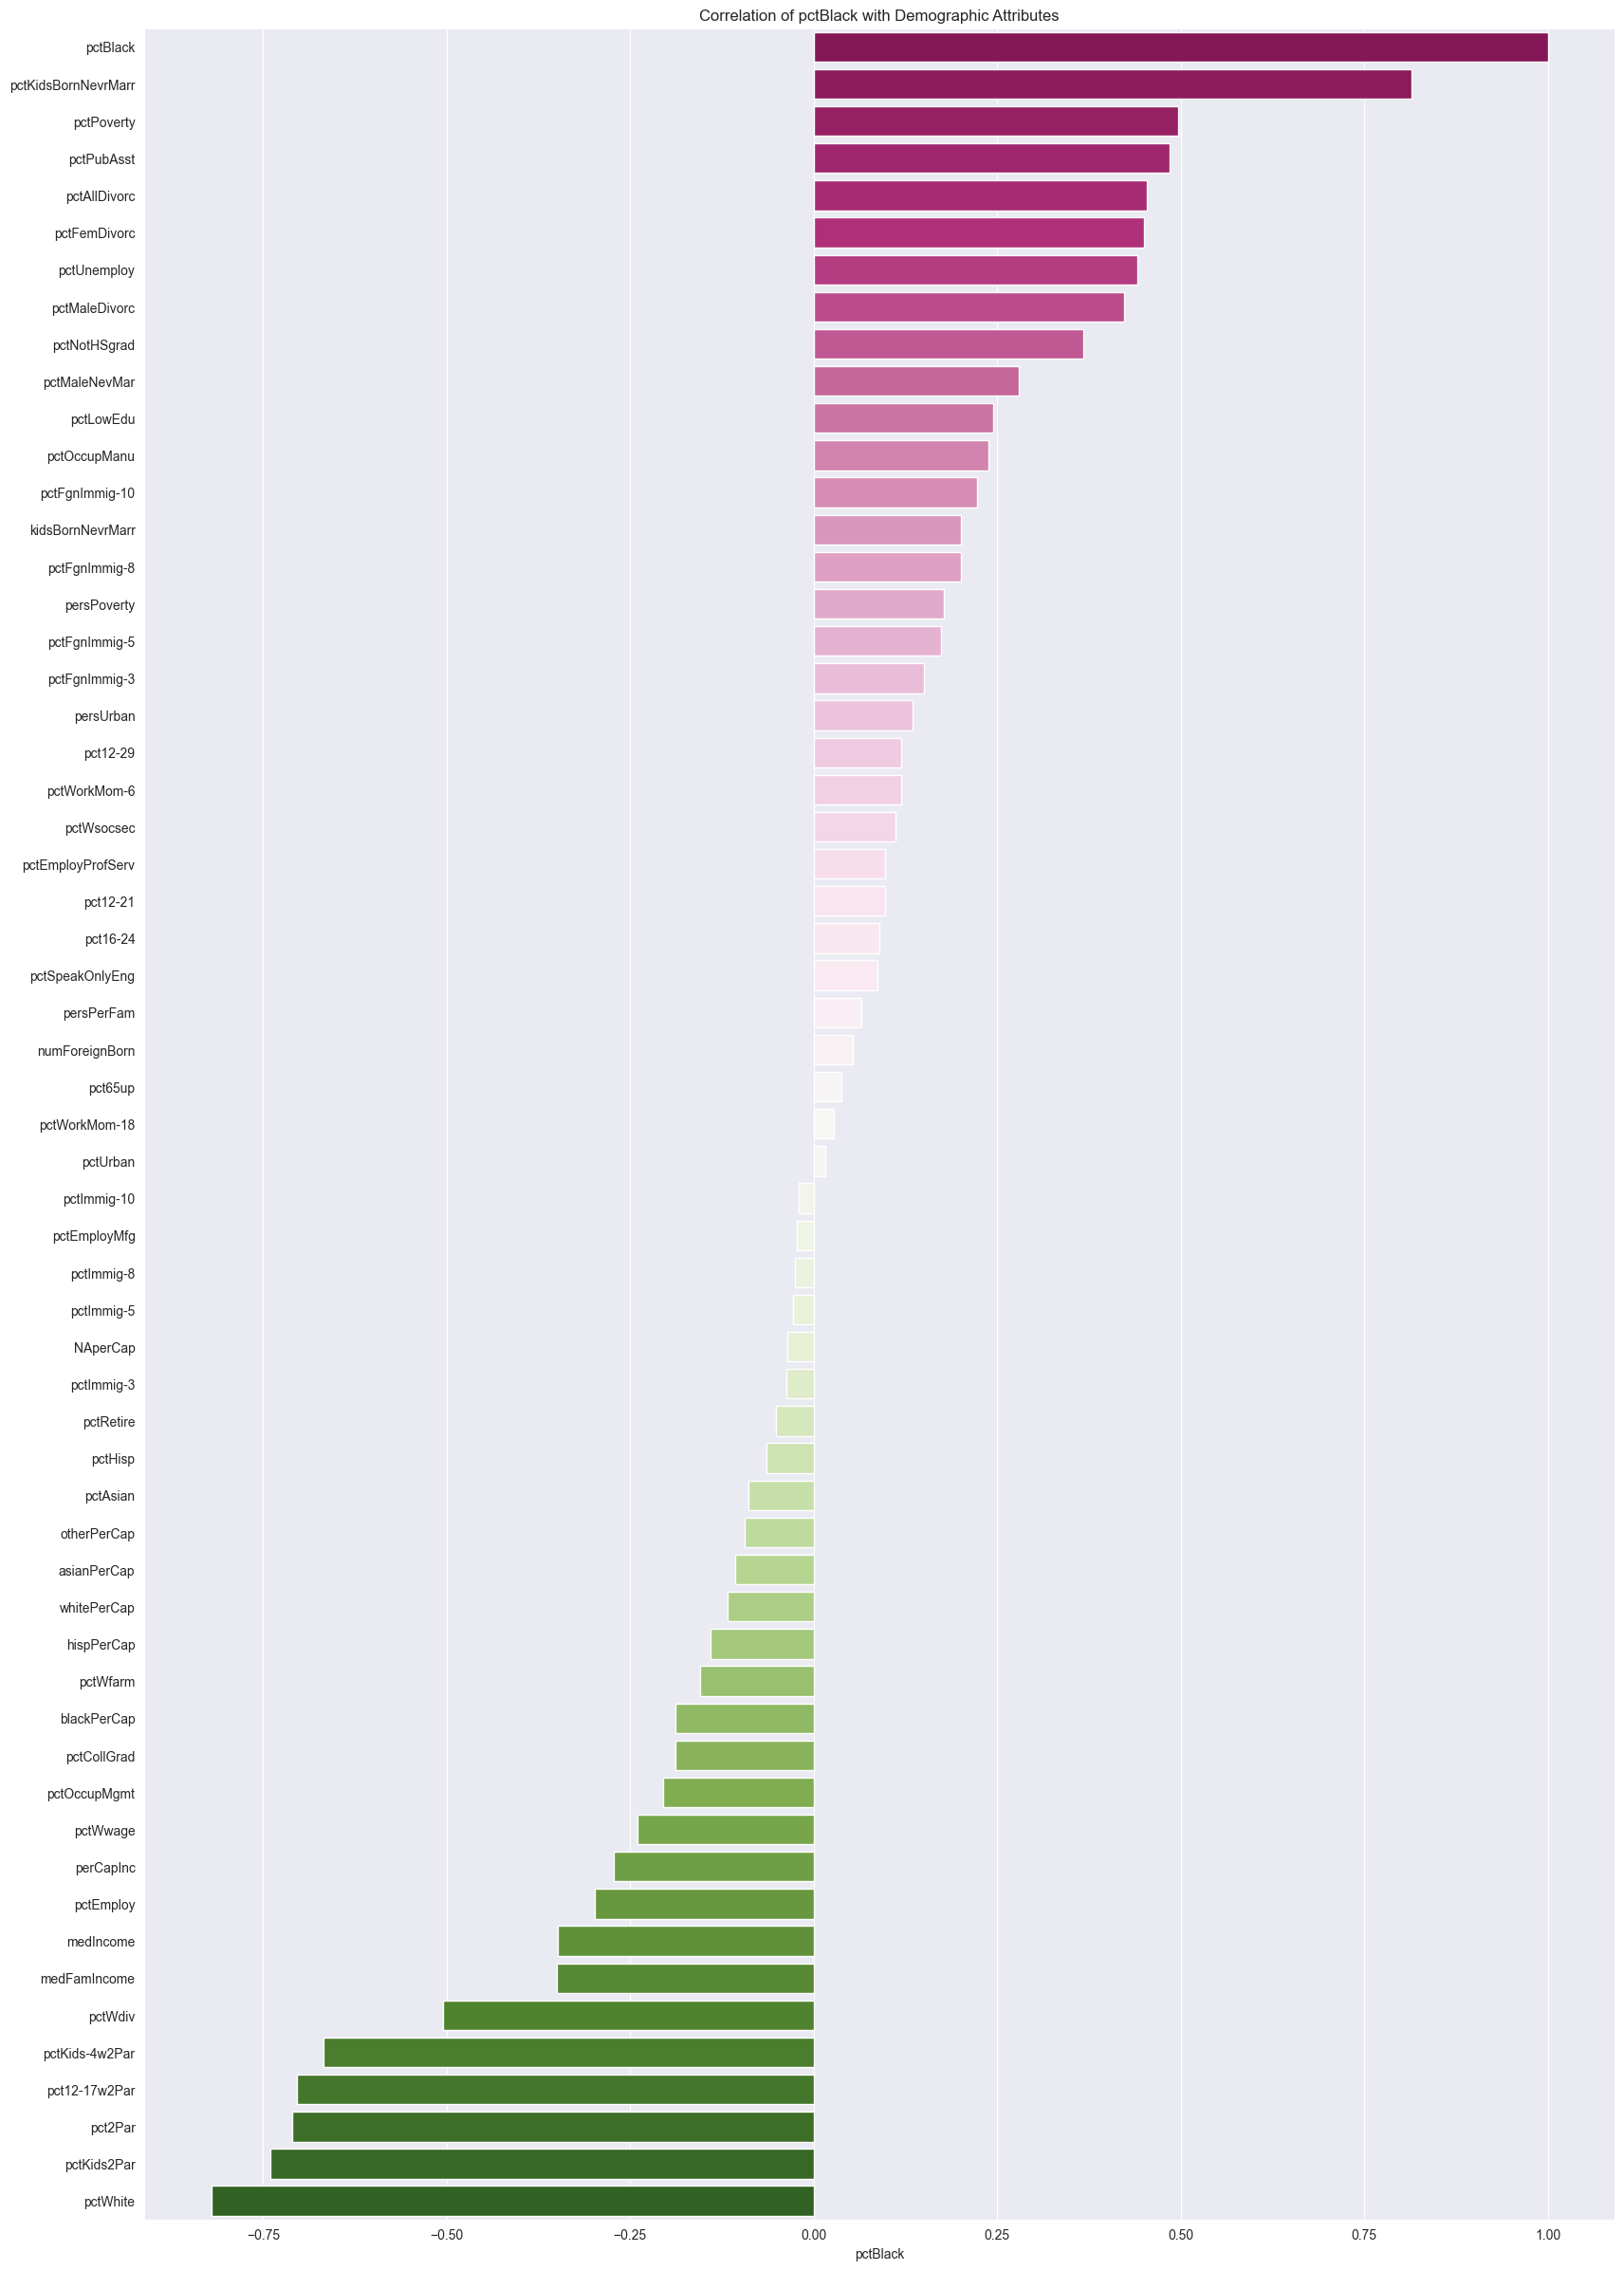

In [26]:
#Correlation between pctBlack & pctWhilt & other demographic attributes
sns.set_style("darkgrid")
plt.figure(figsize=(20, 30))
sns.barplot(x=df.correlation['pctBlack'][demography_attributes].sort_values(ascending=False), 
            y=df.correlation['pctBlack'][demography_attributes].sort_values(ascending=False).index, 
            palette="PiYG")
plt.title("Correlation of pctBlack with Demographic Attributes")
plt.show()


# We can see that pctBlack is strongly correlated with some of the other attributes that were strongly correlated with Violent Crimes
* These include poverty, divorce, unemployment, and illiteracy rates.
* So while a certain race may be correlated with higer crime rates... It is important to consider the other factors as well.
* This shows the shallow nature of a univariate analysis, and the need for a multivariate analysis.

# Predictive Modelling
* In the following section, we will be using various predictive models.
* These models can be used to predict the number of violent crimes in a particular area, given the demographics of that area.
* These models can also be used to find out which attributes are the most important in predicting the number of violent crimes.
* The later is a good example of a multivariate analyis, as we will be considering all the attributes together, and not just one at a time.
## K-Means Clustering
* K-Means Clustering is an unsupervised learning algorithm.
* It is used to find patterns in the data, and group similar datapoints together.
* Let's find patterns in the data using K-Means Clustering

* Let's list out the attributes of interest that we will be using for K-Means Clustering

In [27]:
attribute_of_interest = [
    'pctBlack',
    'pctWhite',
    'pctLowEdu',

    'pctPoverty',
    'perCapInc',
    'pctUnemploy',
    'medFamIncome',

    'pctNotSpeakEng',
    'pctForeignBorn',
    'pctAllDivorc',
]

attribute_of_interest.extend(crime_attributes)
attribute_of_interest

['pctBlack',
 'pctWhite',
 'pctLowEdu',
 'pctPoverty',
 'perCapInc',
 'pctUnemploy',
 'medFamIncome',
 'pctNotSpeakEng',
 'pctForeignBorn',
 'pctAllDivorc',
 'murders',
 'murdPerPop',
 'rapes',
 'rapesPerPop',
 'robberies',
 'robbbPerPop',
 'assaults',
 'assaultPerPop',
 'burglaries',
 'burglPerPop',
 'larcenies',
 'larcPerPop',
 'autoTheft',
 'autoTheftPerPop',
 'arsons',
 'arsonsPerPop',
 'violentPerPop',
 'nonViolPerPop']

* We'll be performing K-Means using the sklearn library.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def optimise_K_means(data, max_k):
    means = []
    inertias=[]

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=[10,5])
    plt.plot(means,inertias,'o-')
    plt.title('Elbow method to find the optimal number of clusters')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()

* We need to know the number of clusters we want to form, for the K-Means algorithm.
* We want our clusters to be as distinct as possible, ie. have as little overlap as possible.
* We can use the Elbow Method to find the optimal number of clusters.

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

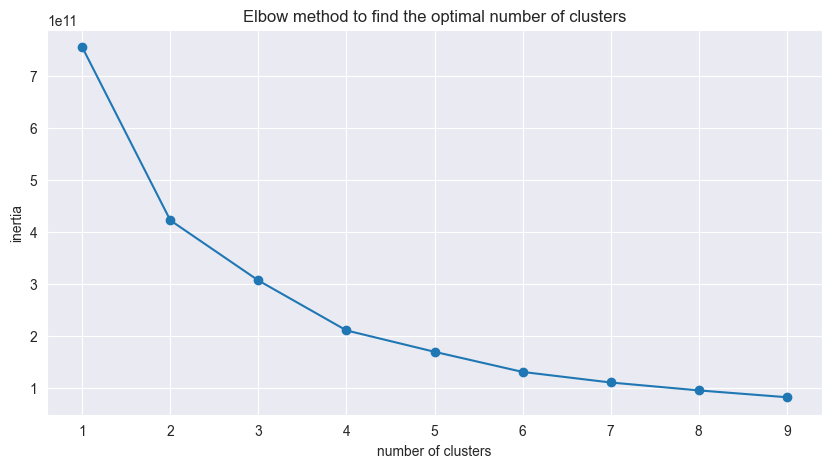

In [29]:
optimise_K_means(df[attribute_of_interest], 10)

* The above graph plots the number of clusters against the sum of squared distances of each point from it's cluster centroid.
* The elbow point is the point where the sum of squared distances stops decreasing rapidly.
* From the above graph, we can see that the elbow point is at 4. There is also a slight elbow at 6. 

## Applying kMeans

In [30]:
kmeans=KMeans(n_clusters=4)
# kmeans.fit(numeric_df[['murders','blackPerCap']])
kmeans.fit(df[attribute_of_interest])

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [31]:
centroids = kmeans.cluster_centers_
#Print centroid Dataframe
centroid_df = pd.DataFrame(centroids, columns = attribute_of_interest)
centroid_df

,pctBlack,pctWhite,pctLowEdu,pctPoverty,perCapInc,pctUnemploy,medFamIncome,pctNotSpeakEng,pctForeignBorn,pctAllDivorc,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,13.688550,78.815420,12.473749,17.375564,11775.888889,7.605954,29713.463953,2.901968,6.371510,12.232841,...,1019.288507,1345.648890,2759.551824,4131.621474,641.866699,564.847177,39.673289,41.182614,805.343514,6046.055097
1,2.653364,91.173818,3.089227,2.894000,29275.490909,3.255455,70304.472727,1.488091,10.345864,7.341045,...,179.450000,575.469273,626.704545,2004.545636,94.772727,292.114182,5.426200,15.430424,230.392354,2928.141885
2,4.767943,89.644606,6.045148,5.609963,17441.314039,4.526170,46311.827586,1.901416,7.852660,9.692956,...,307.632481,703.627605,1068.705665,2643.815406,189.879211,387.625469,11.395652,23.382197,368.893363,3790.031928
3,27.256667,50.160000,15.923333,19.923333,15122.666667,9.546667,33143.666667,11.570000,27.883333,12.340000,...,65036.333333,1488.466667,158512.666667,3686.636667,70888.666667,1577.083333,3746.000000,89.776667,1700.611305,6841.966667


* The above are the centroids of the 4 clusters.
* The centroids are a good representation of the cluster.


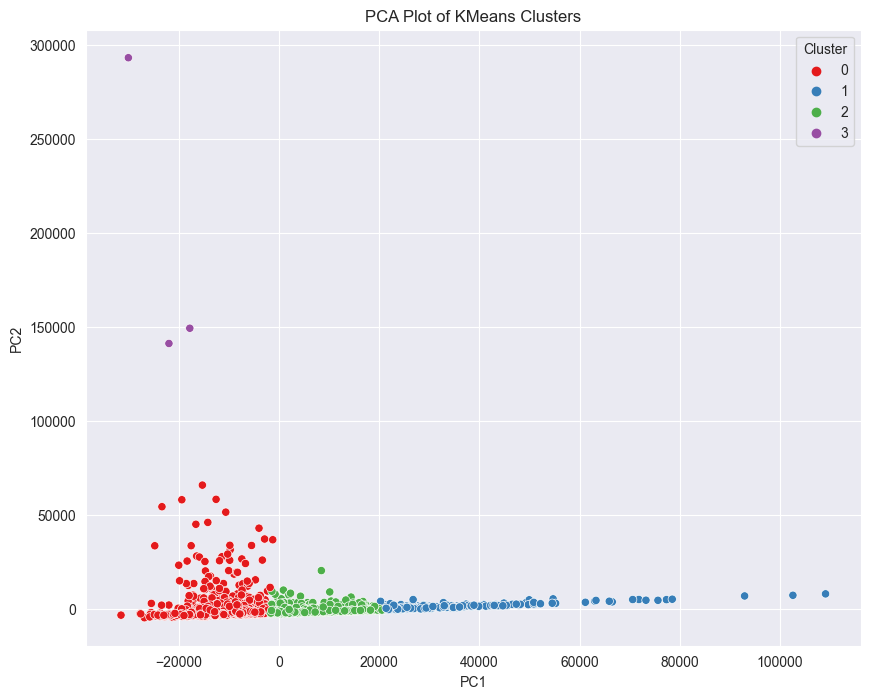

,pctBlack,pctWhite,pctLowEdu,pctPoverty,perCapInc,pctUnemploy,medFamIncome,pctNotSpeakEng,pctForeignBorn,pctAllDivorc,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,13.688550,78.815420,12.473749,17.375564,11775.888889,7.605954,29713.463953,2.901968,6.371510,12.232841,...,1019.288507,1345.648890,2759.551824,4131.621474,641.866699,564.847177,39.673289,41.182614,805.343514,6046.055097
1,2.653364,91.173818,3.089227,2.894000,29275.490909,3.255455,70304.472727,1.488091,10.345864,7.341045,...,179.450000,575.469273,626.704545,2004.545636,94.772727,292.114182,5.426200,15.430424,230.392354,2928.141885
2,4.767943,89.644606,6.045148,5.609963,17441.314039,4.526170,46311.827586,1.901416,7.852660,9.692956,...,307.632481,703.627605,1068.705665,2643.815406,189.879211,387.625469,11.395652,23.382197,368.893363,3790.031928
3,27.256667,50.160000,15.923333,19.923333,15122.666667,9.546667,33143.666667,11.570000,27.883333,12.340000,...,65036.333333,1488.466667,158512.666667,3686.636667,70888.666667,1577.083333,3746.000000,89.776667,1700.611305,6841.966667


In [32]:
from sklearn.decomposition import PCA

# Perform PCA on the data
pca = PCA(n_components=2)
pca.fit(df[attribute_of_interest])
pca_df = pca.transform(df[attribute_of_interest])

# Add the cluster labels to the PCA dataframe
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('PCA Plot of KMeans Clusters')
plt.show()

# Print the centroids corresponding to each cluster
centroid_df



# Multiple Regression
* Let's try to predict the number of violent crimes using multiple regression
* We can also compare the coefficients of the attributes to see which ones are more important

In [33]:
attributes_of_intrest = [
    'pctBlack',
    'pctWhite',
    'pctLowEdu',

    'otherPerCap',
    'whitePerCap',
    'blackPerCap',
    'pctPoverty',
    'persPoverty',
    'perCapInc',
    'pctUnemploy',

    'pctNotSpeakEng',
    'pctForeignBorn',
    'pctAllDivorc',
    'pctKidsBornNevrMarr',
    
    'pctEmploy',
    'numForeignBorn',
    'pctKids2Par'
    
]

### The following is an implementation of Linear Regression using gradiwent descent, from scratch.

In [34]:
class LinearRegression () :

    def __init__(self, lr, n_itr) :
        self.lr = lr
        self.n_itr = n_itr
        
        self.cost_values = []
        self.ls_w_values = []
        self.ls_b_values = []
        self.ls_y_preds =[]
    
    def fit_line(self, X_tr, y_tr) :
        """
        X_tr : 2D Numpy array with all the feature values, after feature scaling
        y_tr : 1D Numpy array with the corresponding sale prices
        """
        self.n_samples, self.n_features = X_tr.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        self.X_tr = X_tr
        self.y_tr = y_tr

        self.gradient_descent()
        

    #Gradient Descenet
    def gradient_descent(self) :
        for _ in range(self.n_itr) :

            #List of predictions for current weights and bias
            y_preds = self.f_wb(self.X_tr)

            #Save values for current weights and bial (every n iterations)
            if(self.n_itr%1000 == 0) :
                self.cost_values.append(self.J_wb(y_preds))
                self.ls_w_values.append(self.weights)
                self.ls_b_values.append(self.bias)
                self.ls_y_preds.append(self.ls_y_preds)

            #Update the weights and bias
            self.update_wb()

    #Update weights and bias    
    def update_wb(self) :

        #Calculating Gradients
        dw = (1/self.n_samples) * np.dot( self.X_tr.T , ( self.f_wb(self.X_tr) - self.y_tr ) )
        db = (1/self.n_samples) * np.sum( self.f_wb(self.X_tr) - self.y_tr )
        
        #Update
        self.weights -= self.lr * dw
        self.bias -= self.lr * db


    #Helper functions  

    #cost function
    def J_wb(self, y_hat) :
        return ( 1 / 2*self.n_samples) * np.sum(np.square(y_hat - self.y_tr))

    #hypothesis
    def f_wb(self, X) :
        #print( X.dot(self.weights) + self.bias )
        return np.dot(self.weights, X.T) + self.bias
        


In [35]:
from sklearn import model_selection as m
Y = df['violentPerPop'].values
X = df[demography_attributes].values

X_train, X_test, Y_train, Y_test = m.train_test_split(X, Y, test_size=0.3)

In [36]:
# FEATURE SCALLING

X_new=[]
for feature_list in X_train.T :
    feature_list = ( feature_list - feature_list.mean() ) / (feature_list.max() - feature_list.min()) 
    #print('Modified feature lis - \n', feature_list)
    X_new.append(feature_list)
X_train = np.array(X_new)
X_train = X_train.T

X_new=[]
for feature_list in X_test.T :
    feature_list = ( feature_list - feature_list.mean() ) / (feature_list.max() - feature_list.min()) 
    #print('Modified feature lis - \n', feature_list)
    X_new.append(feature_list)
X_test = np.array(X_new)
X_test = X_test.T

print('\nX_train = \n', np.round(X_train, 5))
print('\n X_test = \n', np.round(X_test, 5))


X_train = 
 [[ 0.22213 -0.17135 -0.02682 ... -0.01334 -0.01937  0.04453]
 [-0.08148  0.14531 -0.04005 ... -0.09029 -0.08955  0.11234]
 [-0.02955 -0.08564  0.02997 ...  0.10623  0.11363 -0.09229]
 ...
 [-0.08965  0.10271 -0.02142 ... -0.04531 -0.05278  0.09688]
 [-0.08913  0.14644 -0.035   ... -0.0749  -0.07454  0.07946]
 [-0.09389  0.15057 -0.03587 ... -0.07964 -0.08005  0.08855]]

 X_test = 
 [[ 0.05309 -0.06998 -0.06095 ... -0.09178 -0.08883 -0.05166]
 [-0.09977  0.10845  0.06422 ... -0.0509  -0.04104  0.05029]
 [ 0.25216 -0.20917 -0.02264 ...  0.14026  0.14703 -0.18917]
 ...
 [ 0.57021 -0.48692 -0.04861 ... -0.07526 -0.07321  0.09818]
 [ 0.46596 -0.42013 -0.04284 ... -0.05875 -0.05728  0.01759]
 [-0.05822  0.12185 -0.05622 ... -0.06081 -0.06447  0.08365]]


In [37]:
#Applying Linear Regression to Data
model = LinearRegression(lr = 0.1, n_itr = 5000)
model.fit_line(X_train, Y_train)

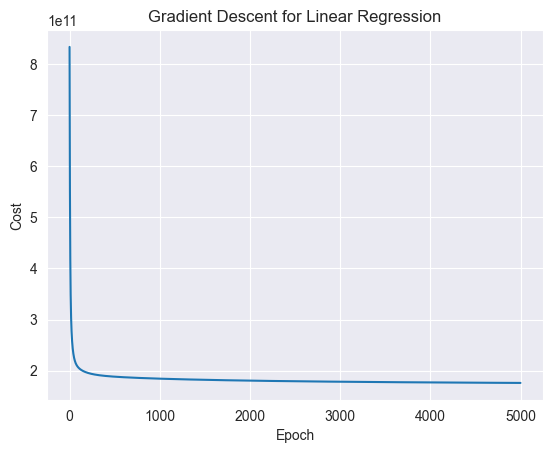

Final cost value =  175866265565.24615
Number of digits in final cost value =  18


In [38]:
#Plotting the graph to show cost value converging
plt.plot(range(model.n_itr), model.cost_values)
plt.title("Gradient Descent for Linear Regression")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

print('Final cost value = ', model.cost_values[-1])
#Numnber of digits in final loss
print('Number of digits in final cost value = ', len(str(model.cost_values[-1])))


In [39]:
#Error and Accuracy

class Error() :
    def __init__(self, predicted, actual) :
        self.predicted = predicted
        self.actual = actual

        self.MSE = (np.mean(np.square(np.subtract(self.predicted, self.actual)))) / len(self.predicted)
        self.RMSE = np.sqrt(self.MSE)
        self.RMSPE = (np.sqrt(np.mean(np.square(((self.predicted - self.actual) / self.actual))))) * 100
        self.NRMSE = self.RMSE / (self.actual.max() - self.actual.min())
        self.r2 = 1 - (np.sum(np.square(self.actual - self.predicted)) / np.sum(np.square(self.actual - self.actual.mean())))
        

    def print_error(self) :

        print("\nRMSE (Root Mean Square) = \t", self.RMSE)
        print("\nNMRMS (Normalised RMSE) = \t", self.NRMSE)
        # print("\nRMSPE (RMS Percentage) = \t", np.round(self.RMSPE, 2), '%')
        print("\nR2 (Squared Correlation) = \t", self.r2)
        print("\nAccuracy of model = \t\t", np.round(self.r2*100, 2), '%') 
    

In [40]:
#Error and Accuracy of the model
My_predictions = model.f_wb(X_test)
print('\nFinal ERROR & ACCURACY Analysis of the model ~ ')
error_final = Error(My_predictions, Y_test)
error_final.print_error()


Final ERROR & ACCURACY Analysis of the model ~ 

RMSE (Root Mean Square) = 	 16.034049312304735

NMRMS (Normalised RMSE) = 	 0.00408987006841207

R2 (Squared Correlation) = 	 0.4860964248659715

Accuracy of model = 		 48.61 %


* Our accuracy seems to be a bit low.
* Let's try to verify this using sklearn's Linear Regression model.

### Using sklearn's Linear Regression model

In [41]:
import sklearn.model_selection as m

Y = df['violentPerPop'].values
X = df[attributes_of_intrest].values
#X = df[demography_attributes].values

X_train, X_test, Y_train, Y_test = m.train_test_split(X, Y, test_size=0.2)

print("Total -\t", len(X))
print("Train -\t", len(X_train))
print("Test  -\t", len(X_test))

Total -	 2214
Train -	 1771
Test  -	 443


In [42]:
X_train, X_test, Y_train, Y_test = m.train_test_split(X, Y, test_size=0.3)

#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

#Predicting the Test set results
Y_pred = reg.predict(X_test)

#Accuracy Metrics
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error - ", mean_squared_error(Y_test, Y_pred))
print("R2 Score - ", r2_score(Y_test, Y_pred))

Mean Squared Error -  174118.3435661009
R2 Score -  0.5415105859976765


In [43]:
X_train, X_test, Y_train, Y_test = m.train_test_split(X, Y, test_size=0.3)

#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

#Predicting the Test set results
Y_pred = reg.predict(X_test)

#Accuracy Metrics
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error - ", mean_squared_error(Y_test, Y_pred))
print("R2 Score - ", r2_score(Y_test, Y_pred))

Mean Squared Error -  158065.57591168917
R2 Score -  0.5669037252228268


### We note that even with sklearn's Linear Regression model, the accuracy is pretty low.
* This is because the data is not linearly separable.
* We can try to improve the accuracy by using a non-linear model,such as a Decision Tree Regressor, or a Random Forest Regressor in the future

In [44]:
# Coefficients of the Linear function
d = {}
d = dict(zip(demography_attributes, reg.coef_))
# Print in ascending order
d_to_plot = {}
for key, value in sorted(d.items(), key=lambda item: item[1]):
    # if key in attributes_of_intrest:
    #     d_to_plot[key] = value
    print("%s \t\t: %s" % (key, value))


pctUrban 		: -17.900635470107407
pctRetire 		: -13.071951720891919
pctWhite 		: -4.490205054749284
pctAsian 		: -2.4144036699428226
pctWsocsec 		: -1.3666138966648491
pct16-24 		: -1.2519597138948515
pctWwage 		: -1.1816480831621448
persUrban 		: -0.04334918138929174
pctBlack 		: -0.0322435162956234
pct12-29 		: -0.0012107273864808894
pct65up 		: 0.00010431040859993357
pctPubAsst 		: 0.00015584307962745976
pctHisp 		: 0.0018841770496163949
pct12-21 		: 0.043235211167098775
medIncome 		: 18.719292361495018
pctWfarm 		: 21.38356995640821
pctWdiv 		: 44.94080041055775


In [45]:
#Print weights with each corresponding attribute name in ascending order
d = dict(zip(demography_attributes, model.weights))
for key, value in sorted(d.items(), key=lambda item: item[1]):
    print("%s \t\t: %s" % (key, value))

pctKids2Par 		: -798.5650364497853
pctUnemploy 		: -719.6055640269432
pctWhite 		: -437.797531875029
pctRetire 		: -408.90265296407284
pctKids-4w2Par 		: -327.57066116515904
pctWdiv 		: -307.67560594577674
pct2Par 		: -304.91278831824195
pctFemDivorc 		: -297.8845713076096
pctWorkMom-18 		: -281.8800710349103
blackPerCap 		: -280.7143702303332
pctOccupManu 		: -268.45527557564054
pctWwage 		: -265.4926423271712
pct12-29 		: -264.13826182467096
medFamIncome 		: -215.31302418731224
pctEmployMfg 		: -163.91805751775158
pctFgnImmig-3 		: -152.51920170198042
pctLowEdu 		: -149.43327634234055
pctAsian 		: -145.95992277850686
pctEmployProfServ 		: -139.41599540606808
pctOccupMgmt 		: -131.45813136212
pctFgnImmig-8 		: -127.84835762548921
medIncome 		: -107.2752698453267
pctPubAsst 		: -96.03071855902682
pct16-24 		: -88.93030344412172
perCapInc 		: -65.48581631837185
pctPoverty 		: -64.24328768889988
pct12-17w2Par 		: -59.305499166254705
pctAllDivorc 		: -50.39329417993802
pct12-21 		: -44.76

# KNN Regression

In [52]:
from sklearn.neighbors import KNeighborsRegressor

# Create a k-NN classifier
k = 8  # Choose the value of k
knn = KNeighborsRegressor(n_neighbors=k)

# Fit the model to the training data
knn.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = knn.score(X_test, Y_test)
print("Accuracy: {:.2f}".format(accuracy))


Accuracy: 0.33
